In [3]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df1 = pd.read_csv("student-mat.csv",sep=";")
df2 = pd.read_csv("student-por.csv",sep=";")
id_cols = [
    "school", "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"
]

df = pd.merge(df1, df2, on=id_cols, how="outer", suffixes=("_math", "_por"))
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,15,R,GT3,T,1,1,at_home,other,...,3.0,1.0,2.0,1.0,1.0,1.0,4.0,13.0,13.0,13.0
1,GP,F,15,R,GT3,T,1,1,other,other,...,5.0,5.0,5.0,1.0,1.0,1.0,2.0,8.0,9.0,9.0
2,GP,F,15,R,GT3,T,1,1,other,other,...,3.0,3.0,4.0,2.0,4.0,5.0,2.0,13.0,11.0,11.0
3,GP,F,15,R,GT3,T,2,2,at_home,other,...,4.0,3.0,1.0,1.0,1.0,2.0,8.0,14.0,13.0,12.0
4,GP,F,15,R,GT3,T,2,4,services,health,...,4.0,3.0,2.0,1.0,1.0,5.0,2.0,10.0,11.0,10.0


In [5]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(682, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           682 non-null    object 
 1   sex              682 non-null    object 
 2   age              682 non-null    int64  
 3   address          682 non-null    object 
 4   famsize          682 non-null    object 
 5   Pstatus          682 non-null    object 
 6   Medu             682 non-null    int64  
 7   Fedu             682 non-null    int64  
 8   Mjob             682 non-null    object 
 9   Fjob             682 non-null    object 
 10  reason           682 non-null    object 
 11  guardian_math    407 non-null    object 
 12  traveltime_math  407 non-null    float64
 13  studytime_math   407 non-null    float64
 14  failures_math    407 non-null    float64
 15  schoolsup_math   407 non-null    object 
 16  famsup_math      407 non-null    object 
 17  paid_m

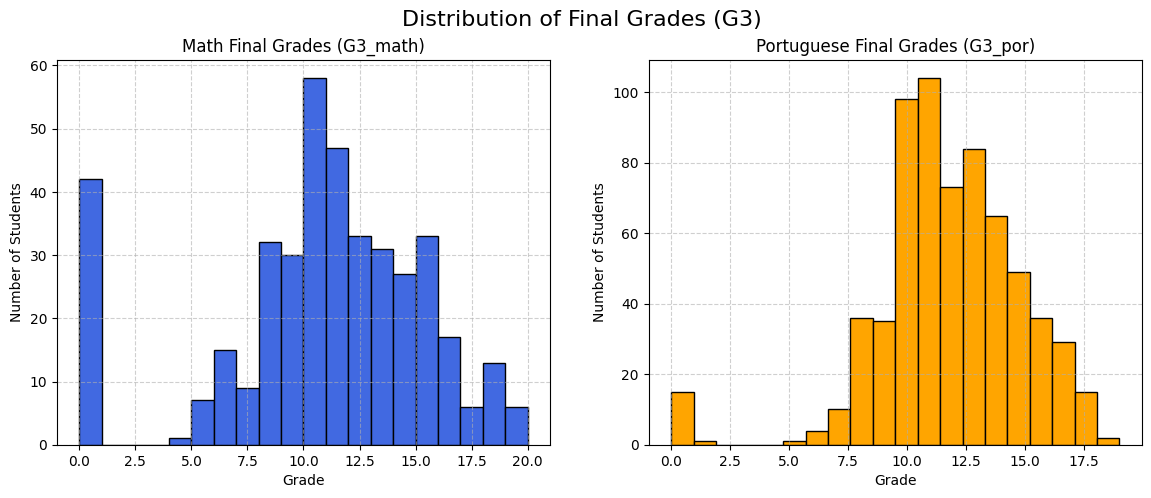

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Distribution of Final Grades (G3)', fontsize=16)

# Plot for Math grades
ax1.hist(df['G3_math'].dropna(), bins=20, color='royalblue', edgecolor='black')
ax1.set_title('Math Final Grades (G3_math)')
ax1.set_xlabel('Grade')
ax1.set_ylabel('Number of Students')
ax1.grid(True, linestyle='--', alpha=0.6)


# Plot for Portuguese grades
ax2.hist(df['G3_por'].dropna(), bins=20, color='orange', edgecolor='black')
ax2.set_title('Portuguese Final Grades (G3_por)')
ax2.set_xlabel('Grade')
ax2.set_ylabel('Number of Students')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.show()

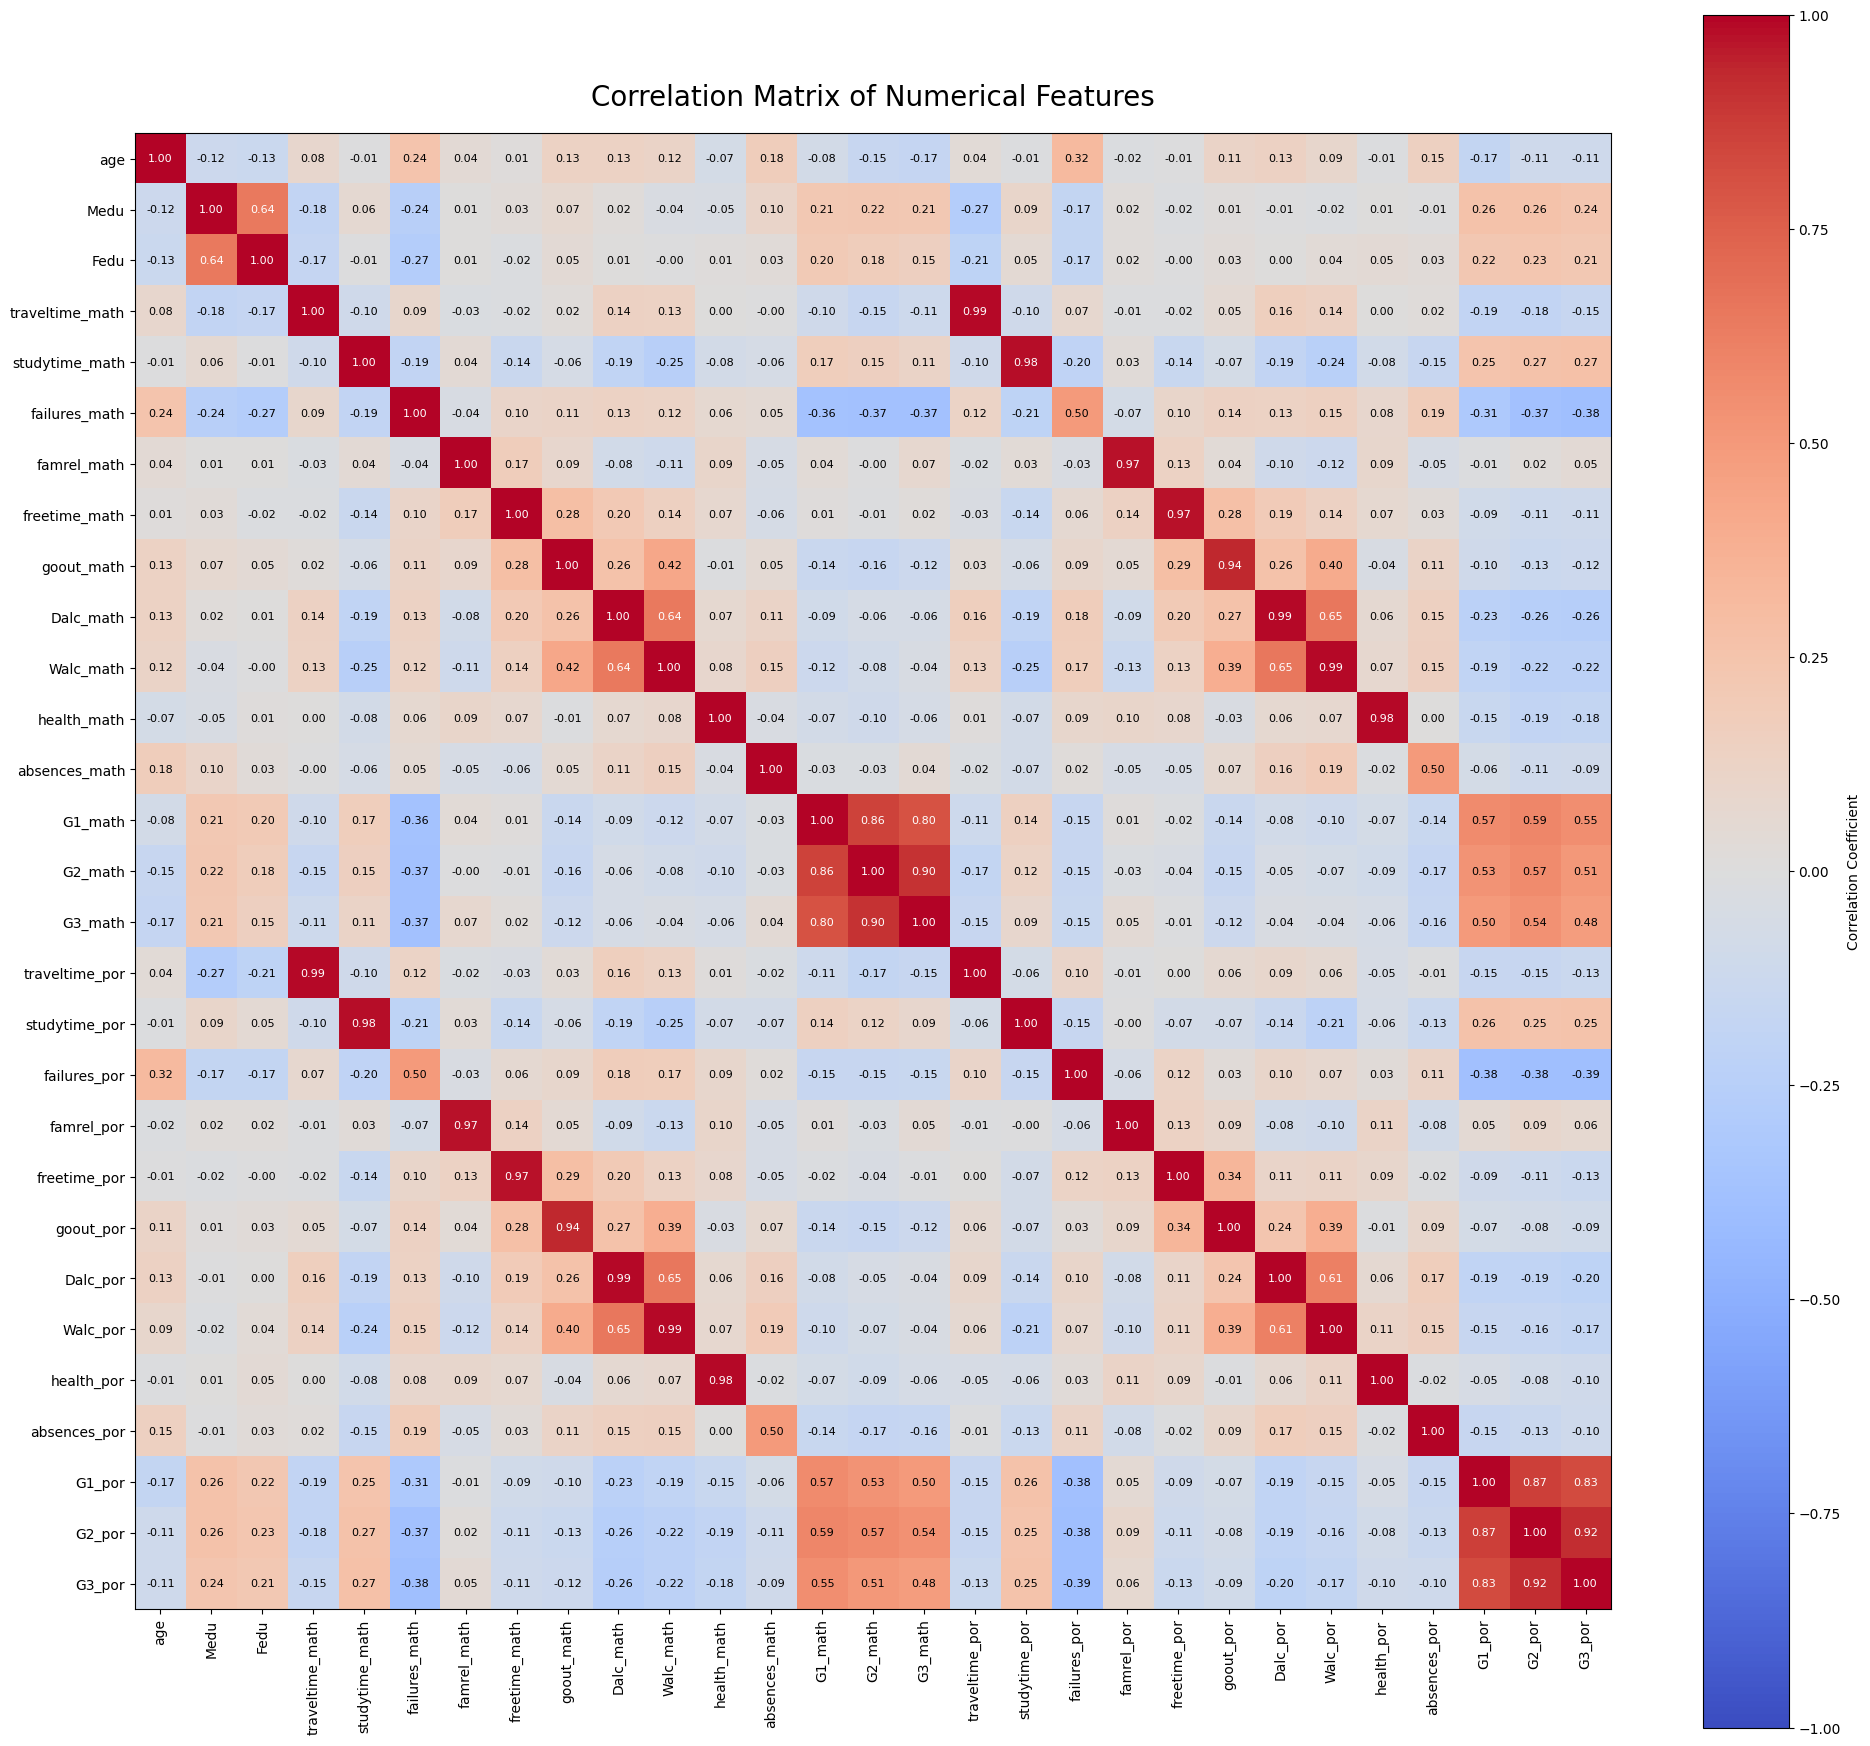

In [13]:
correlation_matrix = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(20, 18))

cax = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax, label='Correlation Coefficient')

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        text_color = "white" if abs(value) > 0.6 else "black"
        ax.text(j, i, f'{value:.2f}',
                ha="center", va="center", color=text_color, fontsize=8)

ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

ax.set_title('Correlation Matrix of Numerical Features', fontsize=20, pad=20)
plt.tight_layout() 
plt.show()

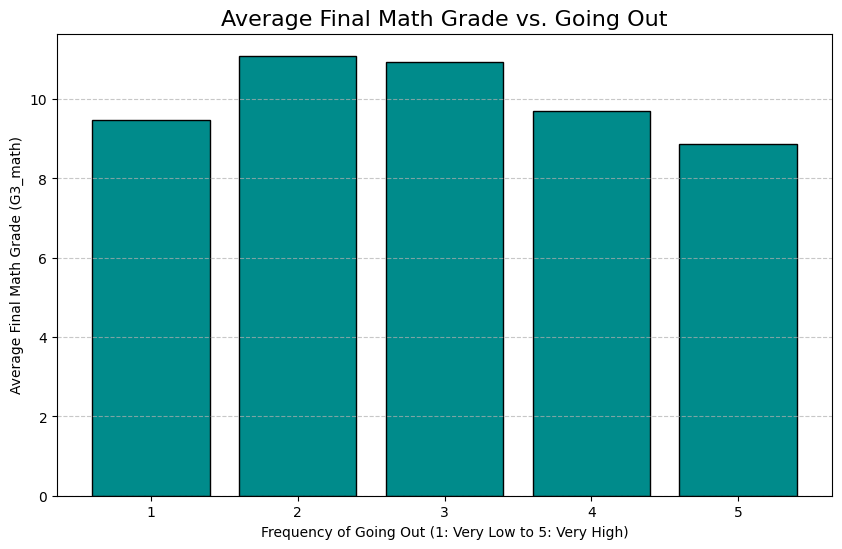

In [14]:
goout_means = df.groupby('goout_math')['G3_math'].mean()
goout_std = df.groupby('goout_math')['G3_math'].std()

plt.figure(figsize=(10, 6))
plt.bar(goout_means.index, goout_means.values, capsize=5, color='darkcyan', edgecolor='black')

plt.title('Average Final Math Grade vs. Going Out', fontsize=16)
plt.xlabel('Frequency of Going Out (1: Very Low to 5: Very High)')
plt.ylabel('Average Final Math Grade (G3_math)')
plt.xticks(goout_means.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

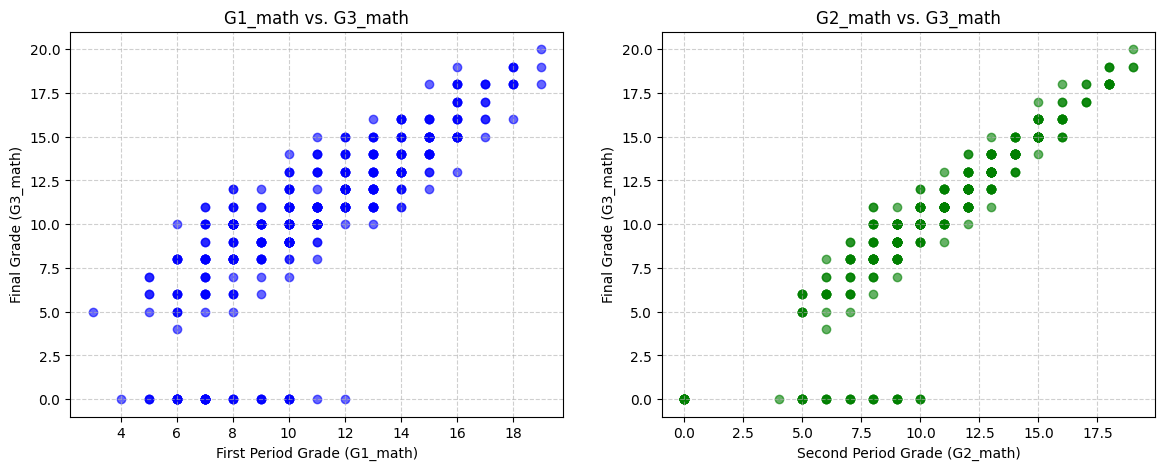

In [ ]:
plt.figure(figsize=(14, 5))

# Subplot 1: G1 vs G3
plt.subplot(1, 2, 1)
plt.scatter(df['G1_math'], df['G3_math'], alpha=0.6, c='blue')
plt.title('G1_math vs. G3_math')
plt.xlabel('First Period Grade (G1_math)')
plt.ylabel('Final Grade (G3_math)')
plt.grid(True, linestyle='--', alpha=0.6)


# Subplot 2: G2 vs G3
plt.subplot(1, 2, 2)
plt.scatter(df['G2_math'], df['G3_math'], alpha=0.6, c='green')
plt.title('G2_math vs. G3_math')
plt.xlabel('Second Period Grade (G2_math)')
plt.ylabel('Final Grade (G3_math)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [15]:
df = df.drop(["reason", "guardian_math", "guardian_por"], axis=1)
print(df.shape)

(682, 50)


In [16]:
df.isnull().sum()

school               0
sex                  0
age                  0
address              0
famsize              0
Pstatus              0
Medu                 0
Fedu                 0
Mjob                 0
Fjob                 0
traveltime_math    275
studytime_math     275
failures_math      275
schoolsup_math     275
famsup_math        275
paid_math          275
activities_math    275
nursery              0
higher_math        275
internet             0
romantic_math      275
famrel_math        275
freetime_math      275
goout_math         275
Dalc_math          275
Walc_math          275
health_math        275
absences_math      275
G1_math            275
G2_math            275
G3_math            275
traveltime_por      25
studytime_por       25
failures_por        25
schoolsup_por       25
famsup_por          25
paid_por            25
activities_por      25
higher_por          25
romantic_por        25
famrel_por          25
freetime_por        25
goout_por           25
Dalc_por   

In [17]:
df['traveltime_math'].fillna(df['traveltime_math'].mean(), inplace = True)
df['traveltime_por'].fillna(df['traveltime_por'].mean(), inplace = True)
df['studytime_math'].fillna(df['studytime_math'].mean(), inplace = True)
df['studytime_por'].fillna(df['studytime_por'].mean(), inplace = True)
df['failures_math'].fillna(df['failures_math'].mode()[0], inplace = True)
df['failures_por'].fillna(df['failures_por'].mode()[0], inplace = True)
df['famrel_math'].fillna(df['famrel_math'].mean(), inplace = True)
df['famrel_por'].fillna(df['famrel_por'].mean(), inplace = True)
df['freetime_math'].fillna(df['freetime_math'].mean(), inplace = True)
df['freetime_por'].fillna(df['freetime_por'].mean(), inplace = True)
df['goout_math'].fillna(df['goout_math'].mean(), inplace = True)
df['goout_por'].fillna(df['goout_por'].mean(), inplace = True)
df['Dalc_math'].fillna(df['Dalc_math'].mode()[0], inplace = True)
df['Dalc_por'].fillna(df['Dalc_por'].mode()[0], inplace = True)
df['Walc_math'].fillna(df['Walc_math'].mode()[0], inplace = True)
df['Walc_por'].fillna(df['Walc_por'].mode()[0], inplace = True)
df['health_math'].fillna(df['health_math'].mean(), inplace = True)
df['health_por'].fillna(df['health_por'].mean(), inplace = True)
df['absences_math'].fillna(df['absences_math'].mean(), inplace = True)
df['absences_por'].fillna(df['absences_por'].mean(), inplace = True)
df['G1_math'].fillna(df['G1_math'].mean(), inplace = True)
df['G1_por'].fillna(df['G1_por'].mean(), inplace = True)
df['G2_math'].fillna(df['G2_math'].mean(), inplace = True)
df['G2_por'].fillna(df['G2_por'].mean(), inplace = True)
df['G3_math'].fillna(df['G3_math'].mean(), inplace = True)
df['G3_por'].fillna(df['G3_por'].mean(), inplace = True)

df['schoolsup_math'].fillna('Unknown', inplace=True)
df['schoolsup_por'].fillna('Unknown', inplace=True)
df['famsup_math'].fillna('Unknown', inplace=True)
df['famsup_por'].fillna('Unknown', inplace=True)
df['paid_math'].fillna('Unknown', inplace=True)
df['paid_por'].fillna('Unknown', inplace=True)
df['activities_math'].fillna('Unknown', inplace=True) 
df['activities_por'].fillna('Unknown', inplace=True)
df['higher_math'].fillna('Unknown', inplace=True)
df['higher_por'].fillna('Unknown', inplace=True)
df['romantic_math'].fillna('Unknown', inplace=True)
df['romantic_por'].fillna('Unknown', inplace=True)


C:\Users\r00t\AppData\Local\Temp\ipykernel_18280\121595644.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['traveltime_math'].fillna(df['traveltime_math'].mean(), inplace = True)
C:\Users\r00t\AppData\Local\Temp\ipykernel_18280\121595644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [18]:
df.isnull().sum()

school             0
sex                0
age                0
address            0
famsize            0
Pstatus            0
Medu               0
Fedu               0
Mjob               0
Fjob               0
traveltime_math    0
studytime_math     0
failures_math      0
schoolsup_math     0
famsup_math        0
paid_math          0
activities_math    0
nursery            0
higher_math        0
internet           0
romantic_math      0
famrel_math        0
freetime_math      0
goout_math         0
Dalc_math          0
Walc_math          0
health_math        0
absences_math      0
G1_math            0
G2_math            0
G3_math            0
traveltime_por     0
studytime_por      0
failures_por       0
schoolsup_por      0
famsup_por         0
paid_por           0
activities_por     0
higher_por         0
romantic_por       0
famrel_por         0
freetime_por       0
goout_por          0
Dalc_por           0
Walc_por           0
health_por         0
absences_por       0
G1_por       

In [19]:
df = pd.get_dummies(df, columns=['school', 'sex', 'address', 'famsize', 'Pstatus',
                           'Mjob', 'Fjob', 'schoolsup_math', 'schoolsup_por',
                           'famsup_math', 'famsup_por', 'paid_math', 'paid_por',
                           'activities_math', 'activities_por', 'nursery',
                           'higher_math', 'higher_por', 'internet', 'romantic_math',
                           'romantic_por'], drop_first=True)
print(df.shape)

(682, 68)
